In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [29]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print(recent_date)

2017-08-23


In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date_obj = dt.datetime.strptime(recent_date, '%Y-%m-%d').date()
start_date = last_date_obj - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,measurement.prcp]
precipitation = session.query(*sel).\
        filter(func.strftime(measurement.date) >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
climate_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
climate_df = climate_df.sort_values("Date").set_index("Date")

#print
climate_df.head()


2016-08-23


,Precipitation
Date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8


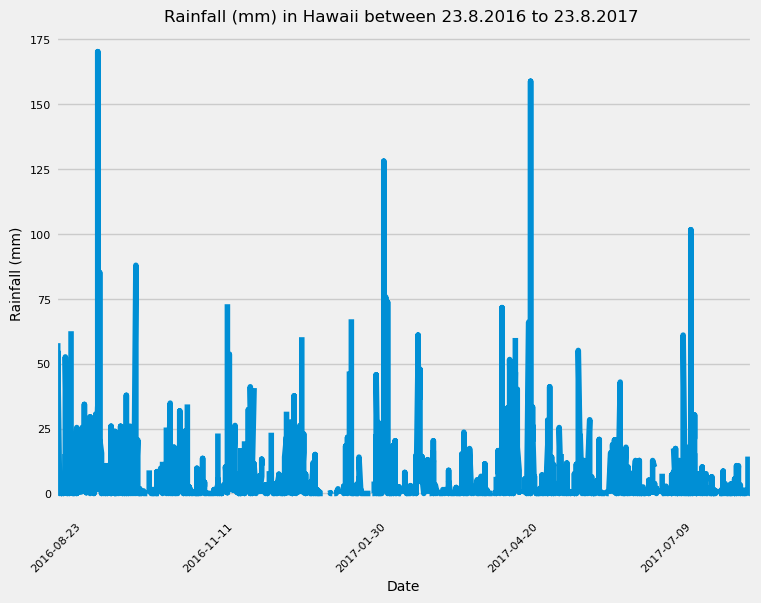

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams.update({
    'font.size': 8,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


# Plot the data
ax.plot(climate_df.index, climate_df['Precipitation'])
ax.xaxis.grid(False)

# Set the x-axis limits and tick marks
ax.set_xlim(climate_df.index.min(0), climate_df.index.max())
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation = 45)

# Set the labels
plt.title("Rainfall (mm) in Hawaii between 23.8.2016 to 23.8.2017 ")
ax.set_ylabel('Rainfall (mm)')
ax.set_xlabel('Date')
# Show the plot
plt.show()

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(measurement.station))).all()
total_stations

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.max(measurement.tobs),
      func.min(measurement.tobs),
      func.avg(measurement.tobs)]
station_temp = session.query(*sel).filter(measurement.station == "USC00519281").\
    group_by(measurement.station)
for station in station_temp:
    print(station)

(29.4, 12.2, 22.03582251082252)


Text(0, 0.5, 'Counts')

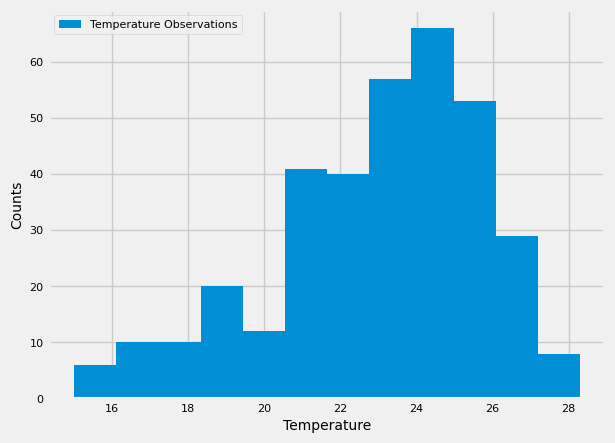

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
        filter(measurement.date >= start_date).all()

station_df = pd.DataFrame(data, columns=['Temperature Observations'])

# station_df.head()

# plot
station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Counts')

# Close Session

In [39]:
# Close Session
session.close()